# Predict Movie Revenue based on Production Cost using Simple Linear Regression Model #

## Author:

### **_*Kevin John*_**


Data downloaded from https://www.the-numbers.com/current/movie/budgets/budgets.php

In [180]:
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

#10.2-analysis and evaluate the Results#

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 

In [181]:
data = pd.read_csv('cost_revenue_clean (Instructor).csv')

In [182]:
pd.set_option('display.max_columns', None)

In [183]:
data

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527
...,...,...
5029,225000000,1519479547
5030,215000000,1671640593
5031,306000000,2058662225
5032,200000000,2207615668


In [184]:
# Sort the DataFrame based on a specific column (e.g., 'production_budget_usd') in ascending order
sorted_data = data.sort_values(by='production_budget_usd')

# Display the sorted DataFrame
print(sorted_data)

# Set display options to show all columns and increase the column width
pd.set_option('display.max_columns', None)


      production_budget_usd  worldwide_gross_usd
339                    1100               181041
16                     5000                 1338
378                    6000               240495
796                    7000              2041928
9                      7000                  900
...                     ...                  ...
5015              275000000           1084439099
4986              300000000            879620923
4999              300000000            963420425
5031              306000000           2058662225
5033              425000000           2783918982

[5034 rows x 2 columns]


In [185]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [135]:
3.29e7

32900000.0

In [136]:
X = DataFrame(data, columns=['production_budget_usd'])
y = DataFrame(data, columns=['worldwide_gross_usd'])

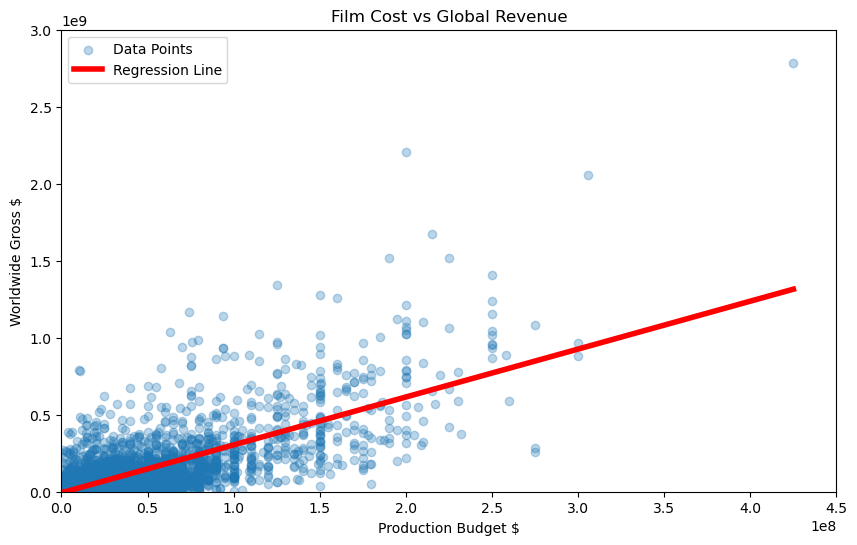

In [137]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Data Points')

# Regression line
plt.plot(X, regression.predict(X), color='red', linewidth=4, label='Regression Line')

# Labels and title
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')

# Set plot limits
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [138]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

Slope coefficient:

In [139]:
regression.coef_    # theta_1

array([[3.11150918]])

In [140]:
#Intercept
regression.intercept_

array([-7236192.72913958])

In [141]:
#Getting r square from Regression
regression.score(X, y)

0.5496485356985729

In [142]:
#Solving for Multicollinarity Issues
scaler = MinMaxScaler()

In [143]:
data['worldwide_gross_usd'] = scaler.fit_transform(data[['worldwide_gross_usd']])
data['production_budget_usd'] = scaler.fit_transform(data[['production_budget_usd']])

In [144]:
fit = smf.ols ('worldwide_gross_usd ~ production_budget_usd', data=data).fit()
print(fit.summary())

                             OLS Regression Results                            
Dep. Variable:     worldwide_gross_usd   R-squared:                       0.550
Model:                             OLS   Adj. R-squared:                  0.550
Method:                  Least Squares   F-statistic:                     6141.
Date:                 Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                         23:26:00   Log-Likelihood:                 8863.1
No. Observations:                 5034   AIC:                        -1.772e+04
Df Residuals:                     5032   BIC:                        -1.771e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           